In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, Point
import numpy as np

from pathlib import Path

from asim.dataset.maps.gpkg.gpkg_map import GPKGMap

from asim.common.visualization.maps.plot_maps import _plot_map_on_ax, _plot_map_on_ax_v2
from asim.common.geometry.base import Point2D
from asim.dataset.maps.map_datatypes import MapSurfaceType


# name = "nuplan_us-pa-pittsburgh-hazelwood"
# name = "carla_town03"
name = "carla_town01"
map_file_path = Path(f"/home/daniel/asim_workspace/asim/notebooks/{name}.gpkg")

map_api = GPKGMap(map_file_path)
map_api.initialize()

In [2]:
from ast import Dict
import gzip
import json

data_path = Path("/home/daniel/carla_workspace/carla_test_data/{town}_Rep1_longest6_route0_05_01_18_32_01")

boxes_path = data_path / "boxes"
semantics_path = data_path / "bev_semantics_augmented"

boxes_path_list = list(boxes_path.iterdir())
boxes_path_list.sort(key=lambda x: x.name)


semantics_path_list = list(semantics_path.iterdir())
semantics_path_list.sort(key=lambda x: x.name)

{'class': 'car',
 'extent': [2.0906050205230713, 0.9970585703849792, 0.6926480531692505],
 'position': [41.42525013905615, -43.22962536259568, -0.015817754012619405],
 'yaw': -1.5713975354109824,
 'num_points': 0,
 'distance': 59.873634500296454,
 'speed': 1.2766241397343947e-08,
 'brake': 0.0,
 'steer': -0.006094432435929775,
 'throttle': 0.8500000238418579,
 'id': 221,
 'role_name': 'background',
 'type_id': 'vehicle.audi.tt',
 'matrix': [[1.0, 0.0, -0.0, 377.92999267578125],
  [0.0, 1.0, 0.0, 330.6099853515625],
  [0.0, -0.0, 1.0, -0.020751571282744408],
  [0.0, 0.0, 0.0, 1.0]]}

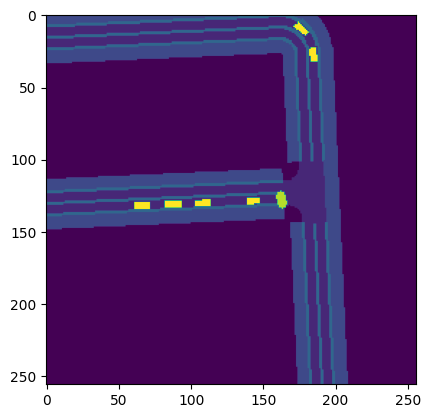

In [3]:
from PIL import Image

def _load_png_as_numpy_array(path: Path) -> np.ndarray:
    with Image.open(path) as img:
        return np.array(img)

def _load_json_gz(path: Path) -> Dict:
    with gzip.open(path, "rt") as f:
        data = json.load(f)

    return data


# np.array(_load_json_gz(path_list[2])[0]["matrix"])
_load_json_gz(boxes_path_list[2])[0]
_load_png_as_numpy_array(semantics_path_list[1]).shape

plt.imshow(_load_png_as_numpy_array(semantics_path_list[30]))
_load_json_gz(boxes_path_list[2])[1]

In [4]:
from typing import List
from asim.common.geometry.base import Point3D
from asim.dataset.observation.bounding_box import BoundingBox3D


def _load_boxes(path: Path) -> List[BoundingBox3D]:
    dictionary = _load_json_gz(path)
    boxes =  [] 
    for box_dict in dictionary:
        if box_dict["class"] in ["ego_car", "car", "walker"]:

            matrix = np.array(box_dict["matrix"])
                
            position = Point3D.from_array(matrix[:, -1][:3])
            position.y = - position.y
            yaw = - np.atan2(matrix[1, 0], matrix[0, 0])

            length, width, height = box_dict["extent"]

            box = BoundingBox3D(position, yaw, 2*length, 2*width, 2*height)
            boxes.append(box)
        else:
            print(f"Unknown class {box_dict['class']}")

    return boxes



ModuleNotFoundError: No module named 'asim.dataset.observation.bounding_box'

In [ ]:
# boxes_path = Path("/home/daniel/carla_workspace/carla_test_data/{town}_Rep1_longest6_route0_05_01_16_58_20/measurements/0000.json.gz")

from asim.common.geometry.tranform_2d import translate_along_yaw


def plot_bounding_box(ax, box: BoundingBox3D, color: str = "red", alpha: float = 1.0):
    box_polygon = box.shapely_polygon
    x, y = box_polygon.exterior.xy
    ax.fill(x, y, color=color, alpha=alpha, edgecolor="black", linewidth=2)
    arrow = np.zeros((2,2))

    arrow[0] = box.center.point_2d.array
    arrow[1] = translate_along_yaw(box.state_se2, Point2D(box.length / 2.0 + 1, 0.0)).point_2d.array
    ax.plot(arrow[:, 0], arrow[:, 1], color="black", alpha=alpha, linewidth=2)




for bb in _load_json_gz(boxes_path_list[100]):
    if (bb["class"] == "traffic_light"):
        print(bb)

{'class': 'traffic_light', 'extent': [1.5, 1.5, 0.5], 'position': [-50.83618588576934, 0.07584415628956868, -0.2158928106811524], 'yaw': 1.5693091883838348, 'distance': 50.836700890736815, 'state': 'Red', 'id': 39, 'affects_ego': False, 'matrix': [[3.6517765238386346e-06, -1.0, -0.0, 323.49786376953125], [1.0, 3.6517765238386346e-06, 0.0, 330.6099853515625], [0.0, -0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]}
{'class': 'traffic_light', 'extent': [1.5, 1.5, 0.5], 'position': [-39.64791280392684, -15.818152241016543, -0.16743549453859863], 'yaw': 3.140108311497876, 'distance': 42.687222498923425, 'state': 'Yellow', 'id': 38, 'affects_ego': False, 'matrix': [[-1.0, -8.662515256219194e-07, 0.0, 334.7098083496094], [8.662515256219194e-07, -1.0, -0.0, 314.73260498046875], [0.0, -0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]}
{'class': 'traffic_light', 'extent': [1.5, 1.5, 0.5], 'position': [-23.443907253791224, -3.9647975693347712, -0.09749610113767716], 'yaw': -1.5722733451938158, 'distance': 23.77700386

Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light


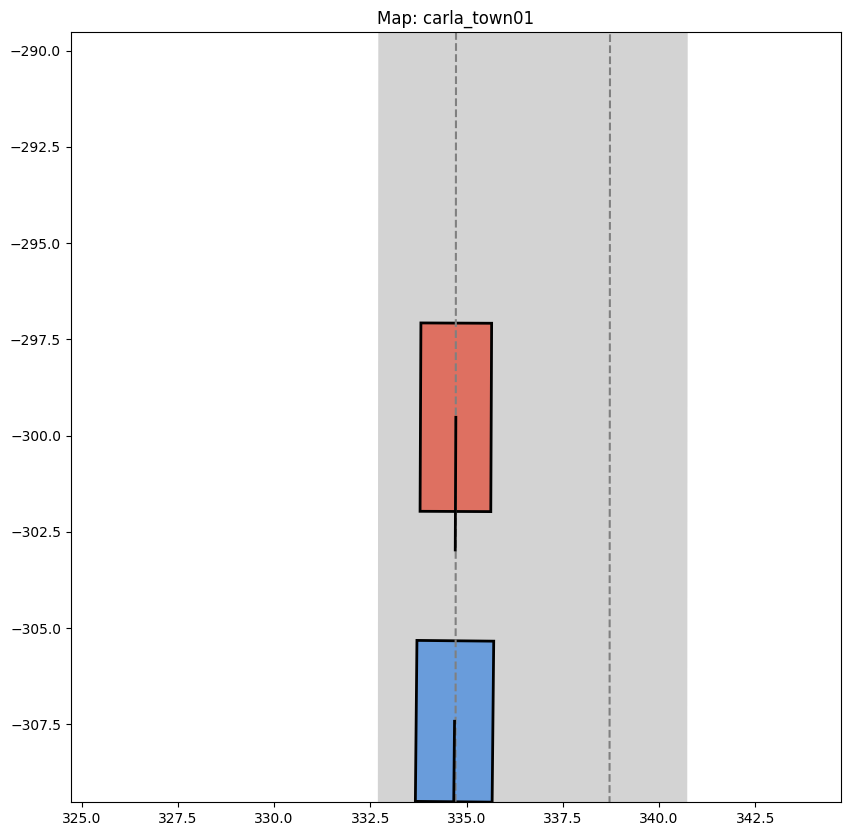

In [ ]:
from matplotlib.patches import Circle
from shapely.geometry import point
from asim.common.visualization.color.lib.ellis import ELLIS_5


def _get_random_point_in_lane(map_api: GPKGMap) -> Point2D:
    random_polygon = map_api._gpd_dataframes[MapSurfaceType.LANE_GROUP].sample(1).geometry.values[0]
    min_x, min_y, max_x, max_y = random_polygon.bounds
    random_point = Point2D(np.random.uniform(min_x, max_x), np.random.uniform(min_y, max_y))
    return random_point


radius = 10.0

index = 10
boxes = _load_boxes(boxes_path_list[index])




# point_2d = _get_random_point_in_lane(map_api)
# 587846.7073014547 4475507.41159812
# point_2d = Point2D(587846.7073014547, 4475507.41159812)
# point_2d = Point2D(589241.2456643095, 4474182.1963188)
# point_2d = Point2D(-270, -1)

# point_2d = Point2D.from_array(np.array(_load_boxes(path_list[2])[0]["matrix"])[:, -1][:2])
point_2d = boxes[0].center

fig, ax = plt.subplots(figsize=(10, 10))
_plot_map_on_ax_v2(ax, map_api, point_2d, radius=radius)

for box_idx, box in enumerate(boxes):
    plot_bounding_box(ax, box, color=ELLIS_5[0].hex if box_idx == 0 else ELLIS_5[4].hex, alpha=1.0)


buffer_radius = 1.0 * radius
ax.set_xlim(point_2d.x - buffer_radius, point_2d.x + buffer_radius)
ax.set_ylim(point_2d.y - buffer_radius, point_2d.y + buffer_radius)

ax.set_aspect("equal", adjustable="box")

In [ ]:
from turtle import forward
import matplotlib.pyplot as plt
import numpy as np
import os

import io
import imageio

from asim.common.geometry.tranform_2d import translate_along_yaw
from asim.common.visualization.color.lib.ellis import ELLIS_5


def plot_ax(ax, index):

    radius = 50.0

    boxes = _load_boxes(boxes_path_list[index])
    point_2d = boxes[0].center

    _plot_map_on_ax_v2(ax, map_api, point_2d, radius=radius)

    for box_idx, box in enumerate(boxes):
        plot_bounding_box(ax, box, color=ELLIS_5[0].hex if box_idx == 0 else ELLIS_5[4].hex, alpha=1.0)

    buffer_radius = 1.0 * radius
    ax.set_xlim(point_2d.x - buffer_radius, point_2d.x + buffer_radius)
    ax.set_ylim(point_2d.y - buffer_radius, point_2d.y + buffer_radius)

    ax.set_aspect("equal", adjustable="box")


def create_animation_gif(start_idx=0, end_idx=500, step=1):   
    
    # Create frames
    images = []
    for i in range(start_idx, end_idx, step):
        fig, ax = plt.subplots(figsize=(10, 10))
        plot_ax(ax, i)

        # Creating PIL image from fig
        buf = io.BytesIO()
        fig.savefig(buf, format="png")
        buf.seek(0)
        images.append(Image.open(buf).copy())

        # close buffer and figure
        buf.close()
        plt.close(fig)

        buf.close()
        plt.close(fig)

    images[0].save("test.gif", save_all=True, append_images=images[1:], duration=50, loop=0)



# Create a gif animation 
create_animation_gif()

Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffic_light
Unknown class traffi